<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Simulation-with-Copulas" data-toc-modified-id="Data-Simulation-with-Copulas-1">Data Simulation with Copulas</a></span></li><li><span><a href="#Inverse-Rosenblatt-Transformation" data-toc-modified-id="Inverse-Rosenblatt-Transformation-2">Inverse Rosenblatt Transformation</a></span></li></ul></div>

In [1]:
import rpy2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

%load_ext rpy2.ipython

# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(8, 6))
sns.set_style('darkgrid')
# Define a color palette
palette = []
palette.append([27, 65, 150])
palette.append([239, 207, 64])
palette.append([124, 170, 198])
palette.append([145, 120, 158])
palette.append([244, 242, 143])
palette = np.array(palette)/255
p = sns.color_palette(palette)
sns.set_palette(p)
p

[(0.10588235294117647, 0.2549019607843137, 0.5882352941176471),
 (0.9372549019607843, 0.8117647058823529, 0.25098039215686274),
 (0.48627450980392156, 0.6666666666666666, 0.7764705882352941),
 (0.5686274509803921, 0.47058823529411764, 0.6196078431372549),
 (0.9568627450980393, 0.9490196078431372, 0.5607843137254902)]

In [10]:
def simulate_brownian_motion(N):
    # DEPRECATED
    def ku_inv(u, v, s, t, phi, phi_inv):
        """
        Simulate Brownian motion from Brownian copula
        phi: cdf
        phi_inv: inverse cdf (quantile function)
        """
        inner = np.sqrt(1-s/t)*phi_inv(v)+np.sqrt(s/t)*phi_inv(u)
        return phi(inner)
    low = 0
    high = 1
    # N = 1000
    u_list = np.random.uniform(low, high, N)
    t_list = list(range(0, N))
    x_list = [u_list[0]]
    for t in t_list[1:]:
        x = ku_inv(x_list[t-1], u_list[t], t-1, t, norm.cdf, norm.ppf)
        x_list.append(x)
    return x_list
# V1 = simulate_brownian_motion(1000)
# plt.plot(V1, '.')
# plt.title('Simulated Time-Series')
# V2 = simulate_brownian_motion(1000)
# plt.plot(V2, '.')

# Data Simulation with Copulas

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

def plot_copula(X1, X2):
    figure = plt.figure(figsize=(15, 15))
    # First, let's take a look at the marginal PDFs/CDFs empircally
    ax1 = figure.add_axes([0, 1, 0.4, 0.2])
    ax1.tick_params(labelsize = 13)
    plt.hist(X1, density=True)
    plt.hist(X2, density=True)
    plt.legend(['X1', 'X2'])
    plt.title('EPDFs', fontsize=14)

    # Construct Empirical marginal CDFs from observations
    ax2 = figure.add_axes([0.5, 1, 0.4, 0.2])
    ax2.tick_params(labelsize = 13)
    ecdf1 = ECDF(X1)
    plt.scatter(ecdf1.x, ecdf1.y)
    ecdf2 = ECDF(X2)
    plt.scatter(ecdf2.x, ecdf2.y)
    plt.legend(['X1', 'X2'])
    plt.title('ECDFs', fontsize=14);

    # Construct uniform variables by mapping X1,X2 through marginal ECDFs
    ax2 = figure.add_axes([0.25, 0.5, 0.4, 0.38])
    ax2.tick_params(labelsize = 13)
    U1 = ecdf1(X1)
    U2 = ecdf2(X2)
    plt.scatter(U1, U2)
    plt.title('Copula for X1, X2', fontsize = 18);

    # Add the fancy marginal histograms on the axes
    ax11 = figure.add_axes([0.17, 0.515, 0.04, 0.35])
    ax11.tick_params(labelsize = 13)
    hist = ax11.hist(U1,
          density=True,edgecolor=palette[-1],
                     linewidth=0.9, orientation='horizontal')
    ax11.set_title('Grade', rotation = 90, fontsize = 17, x = -0.2, y = 0.40)
    ax11.tick_params(axis='y', colors='None', labelsize=14)
    ax11.set_xlabel('$f_{U_2}$', fontsize=18, labelpad=8)
    ax11.spines['left'].set_visible(False)
    ax11.spines['bottom'].set_visible(False)
    ax11.set_xlim([0, 1])
    ax11.set_ylim([0, 1])
    ax11.xaxis.tick_top()
    ax11.invert_xaxis()
    ax11.grid(True)
    
    ax12 = figure.add_axes([0.27, 0.43, 0.35, 0.04])
    ax12.tick_params(labelsize=13)
    hist = ax12.hist(U2, density=True,
              edgecolor=palette[-1], linewidth=0.9)
    ax12.set_title('Grade', rotation = 0, fontsize = 17, y = -0.46)
    ax12.tick_params(axis='x', colors='None')
    ax12.yaxis.tick_right()
    ax12.set_ylabel('$f_{U_1}$', fontsize=18, rotation = 0, labelpad = 20, y = 0.15)
    ax12.set_ylim([0, 1.0])
    ax12.set_xlim([0, 1])
    ax12.spines['left'].set_visible(False)
    ax12.spines['top'].set_visible(False)
    ax12.grid(True)
    plt.show()

In [12]:
# Inverse Rosenblatt Transformation
N = 1000
u1 = np.random.uniform(size=N)
u2 = np.random.uniform(size=N)
U = [u1,u2]

In [13]:
%%R -i U -o X
library(VineCopula)
u1 = unlist(U[1])
u2 = unlist(U[2])

x2 = BiCopHinv1(u1, u2, family = 1, par = .6, par2 = 0, check.pars = TRUE) # h^(-1)(u2|u1)
X = matrix(c(u1, x2), ncol=2)
# X = BiCopSim(1000, family = 1, par = 0.9, par2 = 0, obj = NULL, check.pars = TRUE)


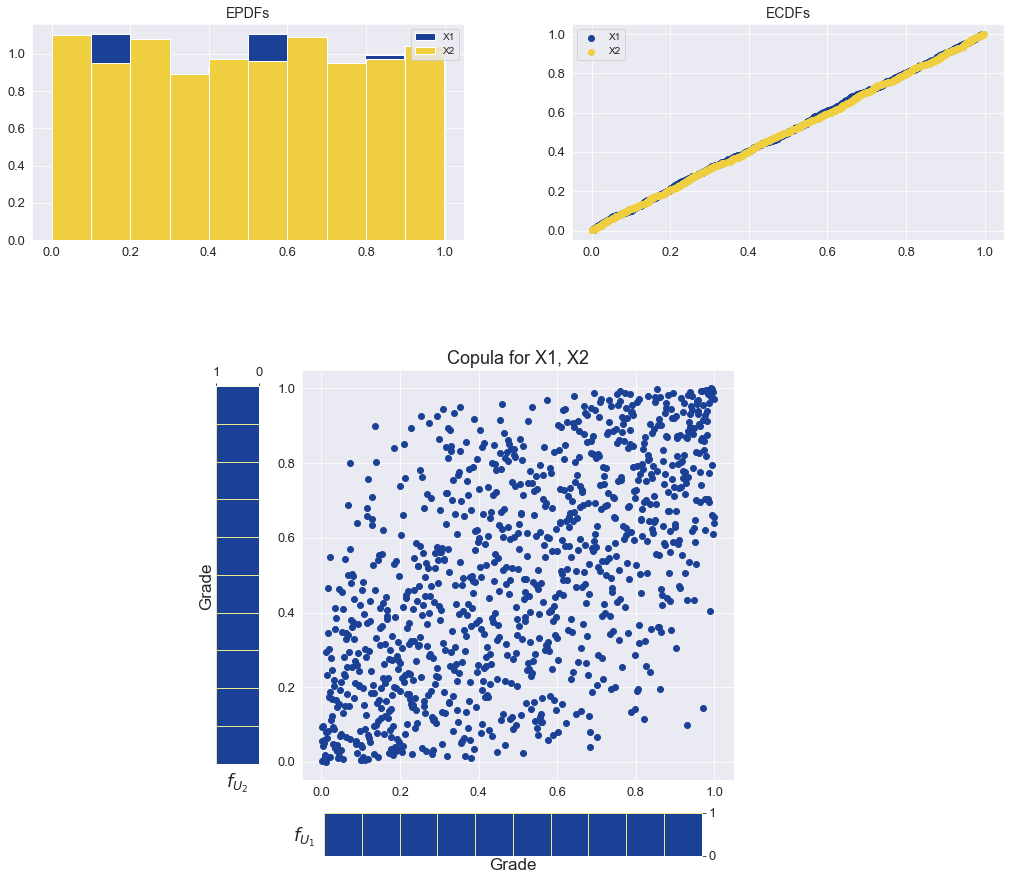

In [14]:
plot_copula(X[:,0], X[:,1])

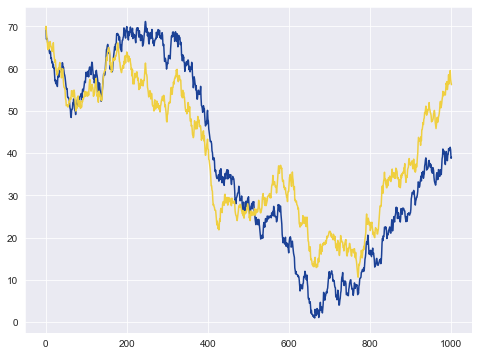

In [15]:
"""
Not completely correct bc log transform issues
"""
# Transform our uniform samples into desired marginal dists
price_changes = np.vstack([norm.ppf(X[:,0]), norm.ppf(X[:,1])]).T # price_changes = 

# Use these price changes to generate a random walk process
start_val1 = 0
start_val2 = 0
prices = np.insert(price_changes, 0, [start_val1, start_val2], axis=0) # prepend start_val to each list
prices = np.cumsum(prices, 0) # cum-sum down columns
if(np.any(prices<0)):
    prices += abs(min(prices.flatten())) + 1 # set minimum price to be $1
plt.plot(prices)

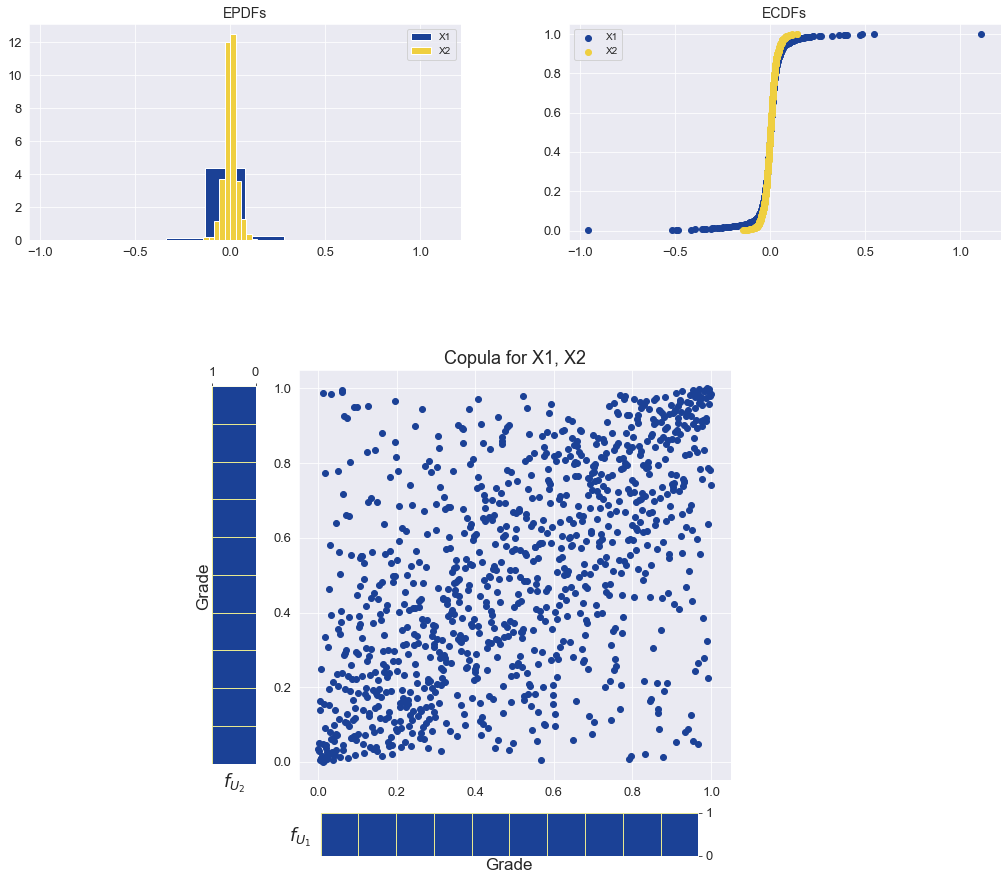

In [16]:
# To make sure this works, lets take a look at the empircal copula of the returns
stock_1 = prices[:,0]
stock_2 = prices[:,1]
returns_1 = np.diff(np.log(stock_1))
returns_2 = np.diff(np.log(stock_2))
plot_copula(returns_1, returns_2)

In [17]:
c=stats.kendalltau(returns_1, returns_2)
c.correlation

0.3995955955955956

In [18]:
c=stats.pearsonr(returns_1, returns_2)
c[0]

0.47183216093368263

In [175]:
def plot_copula(X1, X2):
    # Construct Empirical marginal CDFs from observations
    ecdf1 = ECDF(X1)
    ecdf2 = ECDF(X2)
    # Construct uniform variables by mapping X1,X2 through marginal ECDFs
    U1 = ecdf1(X1)
    U2 = ecdf2(X2)
    
    ## PLOT RESULTS =====================================
    figure = plt.figure(figsize=(15, 15))
    lo = 0.1
    # First, let's take a look at the marginal PDFs/CDFs empircally
    ax1 = figure.add_axes([0, 0.51, 0.43, 0.37])
    ax1.tick_params(labelsize = 13)
    plt.scatter(X1, X2, color=palette[2])
    ax1.set_title("Joint scatter-plot X1,X2", fontsize = 17, y=-0.1, pad=0)    
    
    
    ax14 = figure.add_axes([0, 0.895, 0.43, 0.045])
    ax14.tick_params(labelsize = 12)
    hist = ax14.hist(X1,
              density=True, edgecolor=palette[-1], color=palette[2], linewidth=0.9)
    ax14.set_title('EPDF', fontsize = 14)
    ax14.tick_params(axis='x', colors='None')
    ax14.set_ylabel('$f_{X_1}$', fontsize=14, rotation = 0, labelpad = 10)
    ax14.grid(True)
    
    ax13 = figure.add_axes([0.445, 0.51, 0.04, 0.37])
    ax13.tick_params(labelsize = 12)
    hist = ax13.hist(X2,density=True,edgecolor=palette[-1],
                     linewidth=0.9, color=palette[2], orientation='horizontal')
    ax13.set_title('EPDF', rotation = -90, fontsize = 14, x = 1.1, y = 0.40)
    ax13.tick_params(axis='y', colors='None', labelsize=14)
    ax13.set_xlabel('$f_{X_2}$', fontsize=14, labelpad=0)
    ax13.grid(True)
    
    # Add marginal ECDFS on axes
    ax2 = figure.add_axes([0, 0.96, 0.43, 0.37])
    ax2.tick_params(labelsize = 12)
    ax2.scatter(ecdf1.x, ecdf1.y, color=palette[2],)
    ax2.set_title('ECDF', fontsize=14);
    ax2.tick_params(axis='x', colors='None')
    ax2.set_ylabel('$F_{X_1}$', fontsize=12)
    
    ax33 = figure.add_axes([0.51, 0.51, 0.38, 0.37] )
    ax33.tick_params(labelsize = 12)
    ax33.scatter(ecdf2.y, ecdf2.x, color=palette[2],)
    ax33.set_title('ECDF', fontsize=14, rotation = -90, x=1.02, y=0.41);
    ax33.tick_params(axis='y', colors='None')
    ax33.set_xticks(np.arange(0,1.1,0.2))
    ax33.set_xlabel('$F_{X_2}$', fontsize=12)
    
    lo = 0.05
    ax2 = figure.add_axes([0.45+lo, 0.95, 0.39, 0.37]) ###############################
    ax2.tick_params(colors='None', labelsize = 13)
    plt.scatter(U1, U2)
    plt.title('Copula for X1, X2', fontsize = 18);

    # Add the fancy marginal histograms on the axes
    ax11 = figure.add_axes([0.45, 0.95, 0.045, 0.37])
    ax11.tick_params(labelsize = 12)
    hist = ax11.hist(U1,density=True,edgecolor=palette[-1],
                     linewidth=0.9, orientation='horizontal')
    ax11.set_title('Grade', rotation = 90, fontsize = 17, x = -0.2, y = 0.40)
    ax11.tick_params(axis='y', colors='None', labelsize=14)
    ax11.set_xlabel('$f_{U_2}$', fontsize=18, labelpad=5)
    ax11.spines['left'].set_visible(False)
    ax11.spines['bottom'].set_visible(False)
    ax11.set_xlim([0, 1])
    ax11.set_ylim([0, 1])
    ax11.xaxis.tick_top()
    ax11.invert_xaxis()
    ax11.grid(True)

    ax12 = figure.add_axes([0.5, 0.9, 0.39, 0.04])
    ax12.tick_params(labelsize=12)
    hist = ax12.hist(U2, density=True,
              edgecolor=palette[-1], linewidth=0.9)
    ax12.set_title('Grade', rotation = 0, fontsize = 17, y = -0.46)
    ax12.tick_params(axis='x', colors='None')
    ax12.yaxis.tick_right()
    ax12.set_ylabel('$f_{U_1}$', fontsize=18, rotation = 0, labelpad = 10, y = 0.15)
    ax12.set_ylim([0, 1.0])
    ax12.set_xlim([0, 1])
    ax12.spines['left'].set_visible(False)
    ax12.spines['top'].set_visible(False)
    ax12.grid(True)
#     plt.savefig('cop3.jpg', dpi=300)
#     plt.show()
# plot_copula(returns_1, returns_2)

In [22]:
N=100
%Rpush N

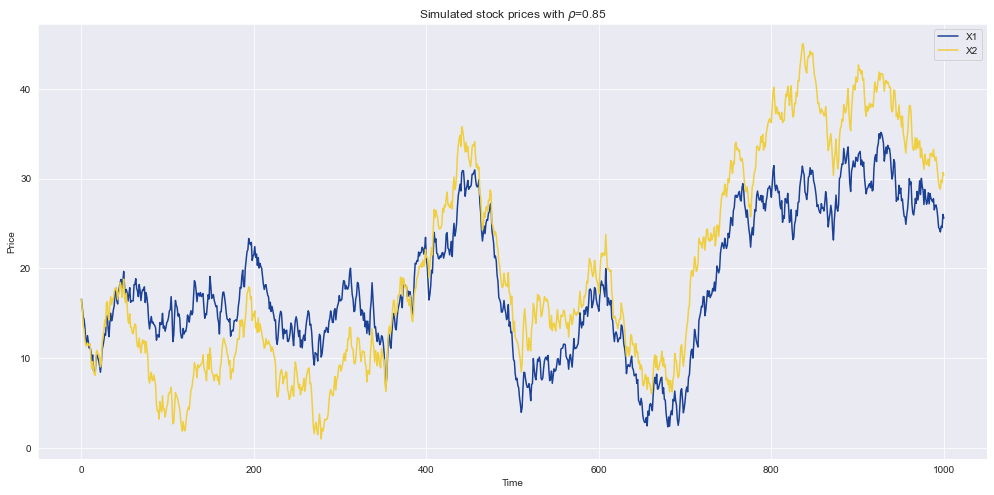

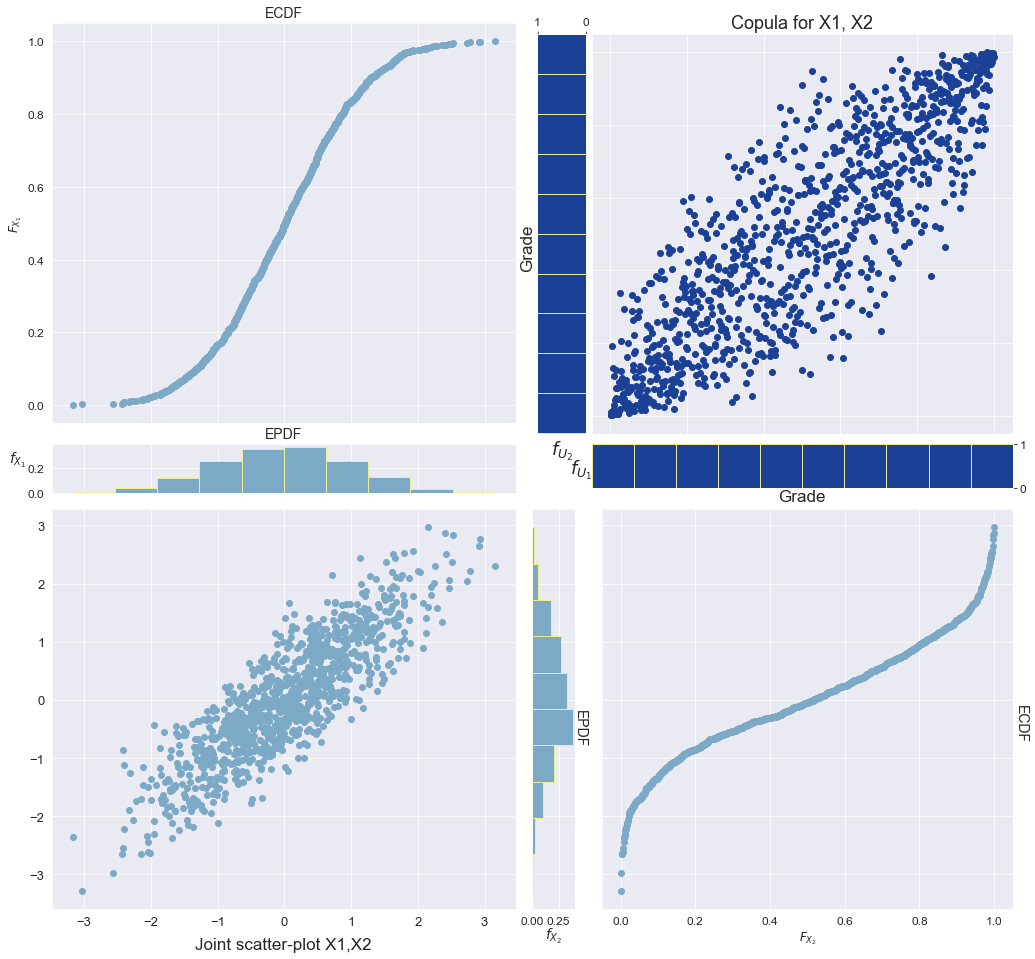

In [174]:
# %%R -i N -o X
def inv_rosen(N, theta):
    %Rpush N theta
    %R library(VineCopula)
    %R u1 = runif(N); u2 = runif(N)
    %R x2 = BiCopHinv1(u1, u2, family = 1, par = theta, par2 = 0, check.pars = TRUE) # h^(-1)(u2|u1)
    %R X = matrix(c(u1, x2), ncol=2);
    x = %Rget X
    return x
# x = inv_rosen(5)
# print(x)

def simulate_codependent_stocks(N, pearson_corr, inv_cdf_func1, inv_cdf_func2):
    U = inv_rosen(N, pearson_corr)
    # Transform our uniform samples into desired marginal dists
    price_changes = np.vstack([inv_cdf_func1(U[:,0]), inv_cdf_func2(U[:,1])]).T # price_changes = 

    # Use these price changes to generate a random walk process
    start_val1 = 0
    start_val2 = 0
    prices = np.insert(price_changes, 0, [start_val1, start_val2], axis=0) # prepend start_val to each list
    prices = np.cumsum(prices, 0) # cum-sum down columns
    if(np.any(prices<0)):
        prices += abs(min(prices.flatten())) + 1 # set minimum price to be $1
    plt.figure(figsize=(17,8))
    plt.plot(prices)
    plt.title(f'Simulated stock prices with $\\rho$={pearson_corr}')
    plt.legend(['X1', 'X2'])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.savefig('simulated_stocks2.jpg', dpi=300)
    return prices[:,0], prices[:,1]

def get_returns(stock_1, stock_2):
    return np.diff(stock_1), np.diff(stock_2)

stock_1, stock_2 = simulate_codependent_stocks(1000, 0.85, norm.ppf, norm.ppf)
returns_1, returns_2 = get_returns(stock_1, stock_2)
plot_copula(returns_1, returns_2)
plt.savefig('simulated_stocks_cop.jpg', dpi=300)

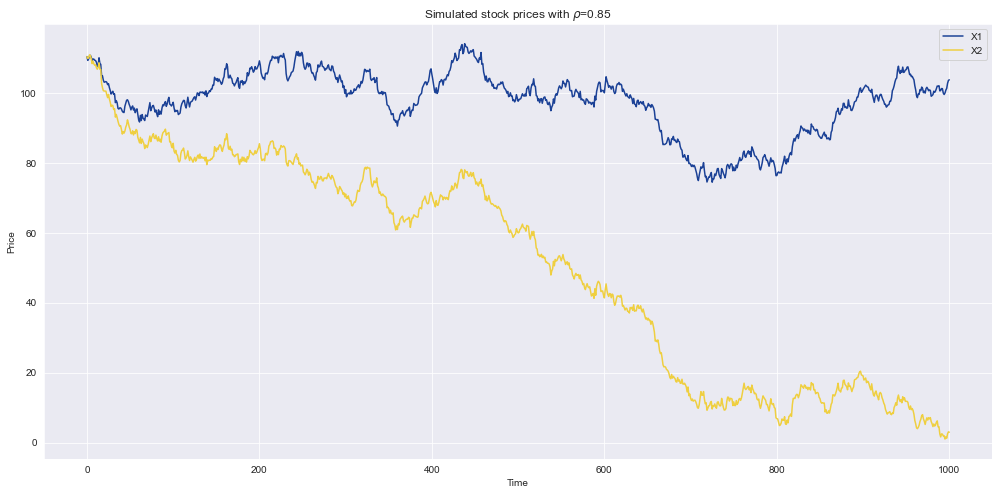

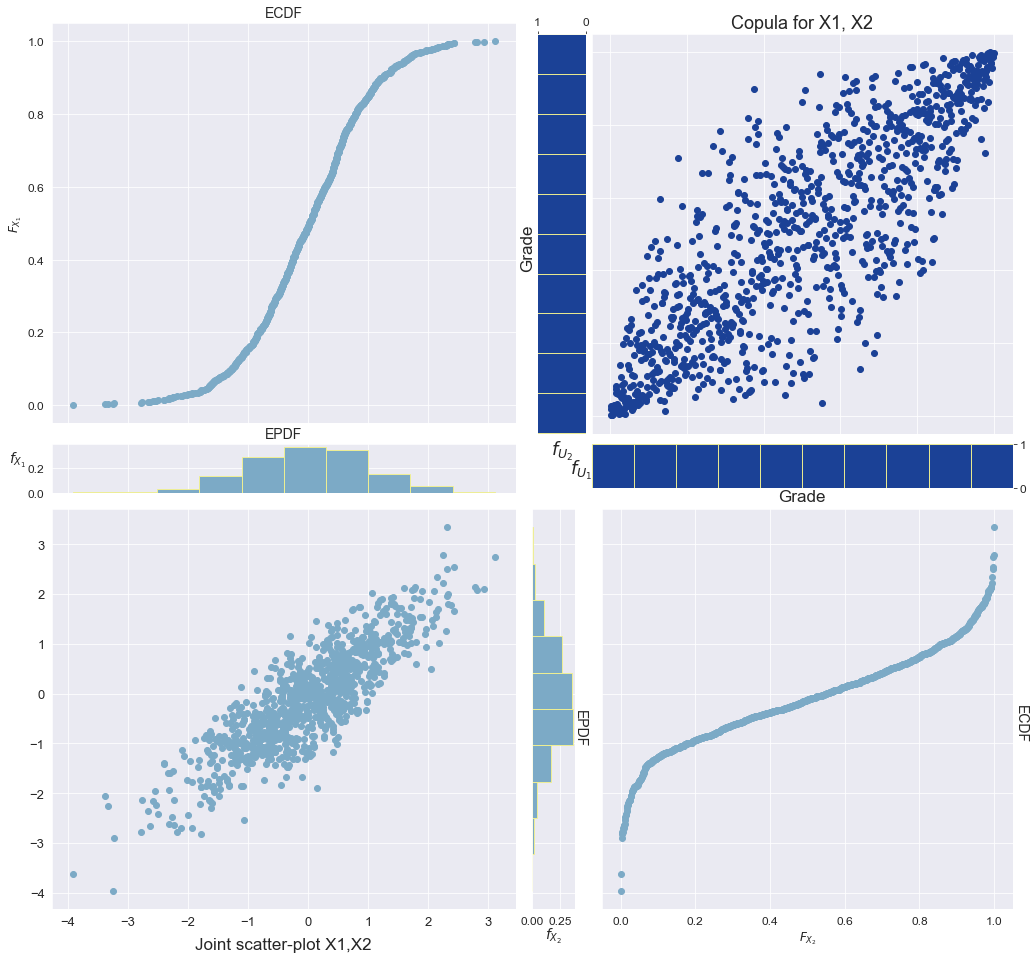

In [177]:
def my_ppf(X):
    return stats.norm.ppf(X, loc=-.1)
#     return stats.beta.ppf(X, 2, 5)
stock_1, stock_2 = simulate_codependent_stocks(1000, 0.85, norm.ppf, my_ppf)
returns_1, returns_2 = get_returns(stock_1, stock_2)
plot_copula(returns_1, returns_2)

In [25]:
from pycopula.copula import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import cm

from pycopula.visualization import pdf_2d, cdf_2d, concentrationFunction
from pycopula.simulation import simulate

corr = [[1, 0.55], [0.55, 1]]
X = np.vstack((np.diff(np.log(stock_1)), 
               np.diff(np.log(stock_2))))
copula = GaussianCopula(R=corr)
copula.fit(np.transpose(X))


Fitting Gaussian copula.


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.9/site-packages/pycopula/copula.py:622: RuntimeWarning: invalid value encountered in power
  cDens = RDet**(-0.5) * np.exp(-0.5 * np.dot(ICDF[i,  :], np.dot(RInv, ICDF[i,  :])))


In [26]:
np.transpose(X)

array([[ 0.01971344,  0.00809002],
       [ 0.0025291 ,  0.00943532],
       [-0.01558247, -0.00946235],
       ...,
       [-0.00340602, -0.00968331],
       [ 0.0144981 ,  0.00087584],
       [ 0.00803424, -0.00250086]])

Text(0, 0.5, 'Stock B Returns (Transformed)')

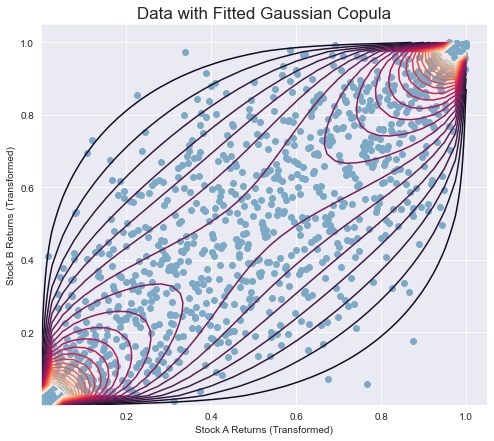

In [27]:
# Construct uniform variables by mapping X1,X2 through marginal ECDFs
ecdf1 = ECDF(returns_1)
ecdf2 = ECDF(returns_2)
grades1 = ecdf1(returns_1)
grades2 = ecdf2(returns_2)

# Contour plot of fitted Gaussian copula
u, v, Carchi = pdf_2d(copula)
X, Y = np.meshgrid(u, v)

plt.figure(figsize=(8,7))
plt.title("Data with Fitted Gaussian Copula", fontsize=17)
plt.contour(X, Y, Carchi, levels = np.arange(0,5,0.2))
plt.scatter(grades1, grades2, color=palette[2])
plt.xlabel('Stock A Returns (Transformed)')
plt.ylabel('Stock B Returns (Transformed)')

# Inverse Rosenblatt Transformation

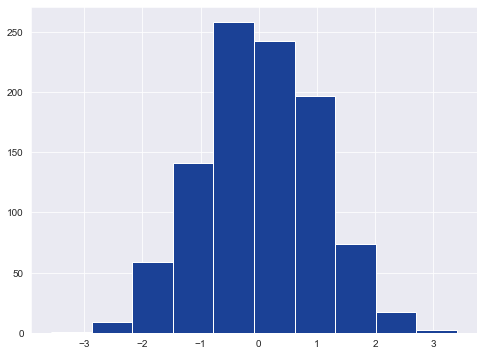

(array([ 12.,  34., 119., 202., 283., 211.,  91.,  40.,   7.,   1.]),
 array([-2.9662276 , -2.30365436, -1.64108112, -0.97850788, -0.31593463,
         0.34663861,  1.00921185,  1.67178509,  2.33435833,  2.99693157,
         3.65950481]),
 <BarContainer object of 10 artists>)

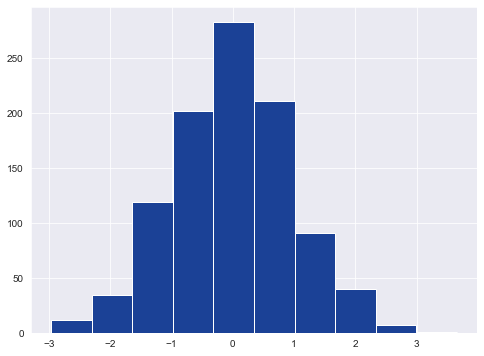

In [76]:
def x1(u, sigma1, m1):
    return stats.norm.ppf(u)*sigma1+m1
def x2(u, x1, sigma1, sigma2, rho, m1, m2):
    return stats.norm.ppf(u)*sigma2*np.sqrt(1-rho**2)+m2-(rho*sigma1/sigma2)*(x1-m1)


N=1000
sigma1 = sigma2 = 1
m1 = 0
m2 = 0
rho = -0.9
u = np.random.uniform(size=N)
x1 = x1(u, sigma1, m1)
u = np.random.uniform(size=N)
x2 = x2(u, x1, sigma1, sigma2, rho, m1, m2)
plt.hist(x1)
plt.show()
plt.hist(x2)

In [77]:
stats.pearsonr(x1, x2)

(0.8960279410091954, 0.0)

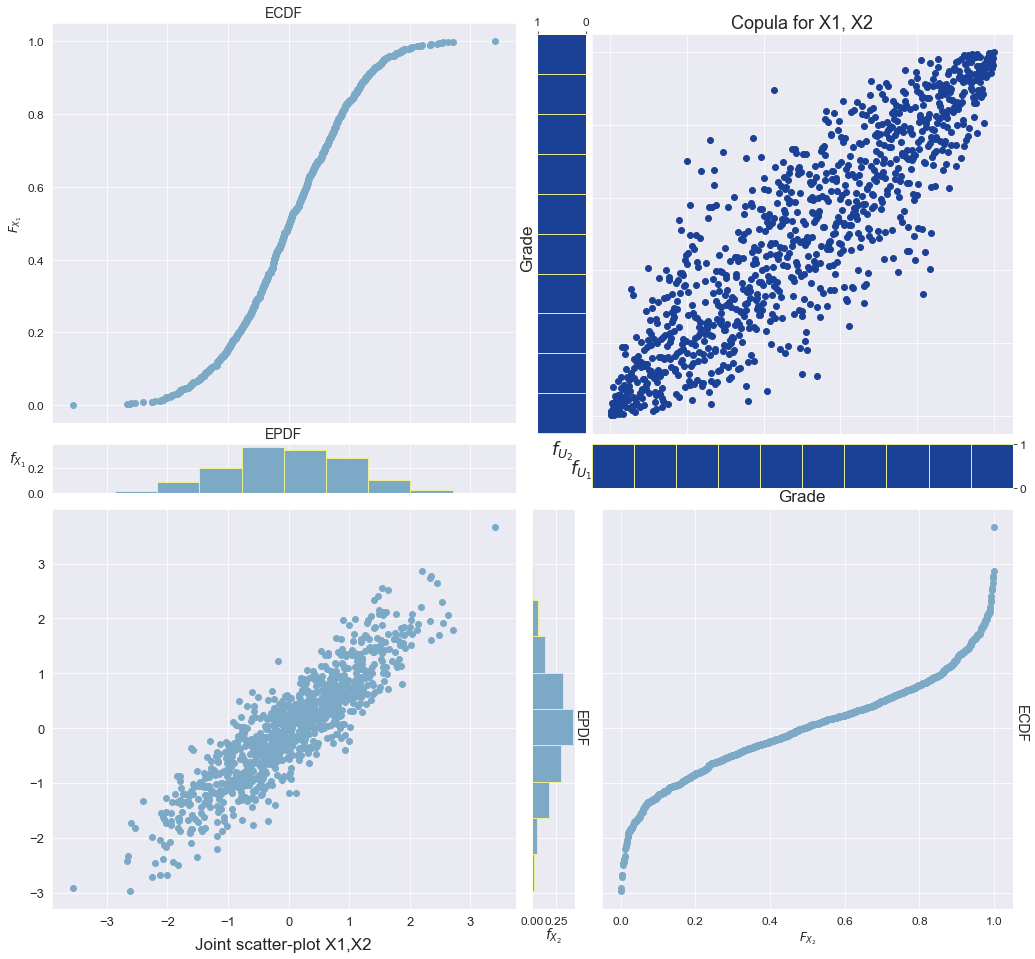

In [78]:
plot_copula(x1, x2)

(array([104.,  95., 104., 112.,  87.,  89., 107., 105.,  99.,  98.]),
 array([0.00102114, 0.10090016, 0.20077917, 0.30065819, 0.4005372 ,
        0.50041622, 0.60029523, 0.70017424, 0.80005326, 0.89993227,
        0.99981129]),
 <BarContainer object of 10 artists>)

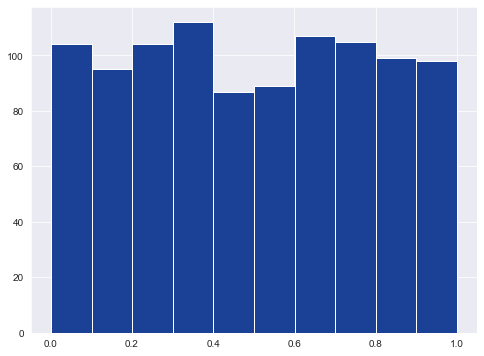

In [62]:
def F2(x2, x1, sigma1, sigma2, rho, m1, m2):
    term = x2-m2+(rho*sigma1/sigma2)*(x1-m1)
    term = term/(sigma2*np.sqrt(1-rho**2))
    return stats.norm.cdf(term)
rho = 0.8
N = 1000
X = np.random.multivariate_normal([0,0], [[1,rho],[rho,1]], size=N)
x1 = X[:,0]
x2 = X[:,1]
s1 = np.std(x1)
s2 = np.std(x2)
rho = -stats.pearsonr(x1, x2)[0]
m1 = np.mean(x1)
m2 = np.mean(x2)
u = F2(x2, x1, s1, s2, rho, m1, m2)
plt.hist(u)

In [56]:
stats.pearsonr(x1, x2)

(0.8214840183459844, 1.0631368463438525e-245)

In [58]:
np.std(x1), np.std(x2)

(1.0197712372827037, 1.0219090233717616)

In [63]:
temp = [[1,rho],[rho,1]]
np.linalg.det(temp)

0.35399667486496456

In [72]:
1-rho**2

0.35399667486496456

In [73]:
np.linalg.inv(temp)

array([[2.82488529, 2.27048268],
       [2.27048268, 2.82488529]])